<p>1.Rigid body formulation using carden angle (mentioned in the paper), show pro/con versus using quaternion
<p>2.Show the formulation of body-joint and how it used to model the "Youbot robot"
<p>3.Study structure of Modia 3D based on ModiaLang and ModiaBase
<p>4.Study the solution sequence outlined in the paper (previous) about the index reduction of DAE
<p>5.Study the solution sequence of Modeling Toolkit</p>

# 1.Rigid body formulation using carden angle

* Euler angles are useful to represent an aribitrary rotation in $R^3$ 
<p> R($\alpha$,$\beta$, $\gamma$ ) = Rot($\hat{z},\alpha$)Rot($\hat{y},\beta$)Rot($\hat{x},\gamma$)
<p>$Rot(\hat{z},\alpha)=\begin{bmatrix}cos\alpha& -sin\alpha & 0\\sin\alpha & cos\alpha & 0\\0 & 0 & 1\end{bmatrix}$   
<p>$Rot(\hat{y},\beta)=\begin{bmatrix}cos\beta& 0 & sin\beta\\0 & 1 & 0\\-sin\beta & 0 & cos\beta\end{bmatrix}$
<p>$Rot(\hat{x},\gamma)=\begin{bmatrix}1& 0& 0\\0 & cos\gamma & -sin\gamma\\0 & sin\gamma & cos\gamma\end{bmatrix}$
<p>$Rot(\alpha,\beta,\gamma)=\begin{bmatrix}cos\alpha \cdot cos\beta& cos\alpha \cdot sin\beta \cdot sin\gamma-sin\alpha \cdot cos\gamma& cos\alpha \cdot sin\beta \cdot cos\gamma+sin\alpha \cdot sin\gamma\\
sin\alpha \cdot cos\beta & sin\alpha \cdot sin\beta \cdot sin\gamma + cos\alpha \cdot cos\gamma & sin\alpha \cdot sin\beta \cdot cos\gamma - cos\alpha \cdot sin\gamma\\
-sin\beta & cos\beta \cdot sin\gamma & cos\beta \cdot cos\gamma\end{bmatrix}$ <br>
<br>
* **Difference between Tait-Bryan and Euler angle:** The only difference is that Tait–Bryan angles represent rotations about three distinct axes (e.g. x-y-z, or x-y′-z″), while proper Euler angles use the same axis for both the first and third elemental rotations (e.g., z-x-z, or z-x′-z″).

* Quaternion
<p>$q=a+bi +cj+dk =[s,v] (s-real, v-imaginary)$
<p>$i^2 = j^2 = k^2 =ijk =-1$
    
<!-- 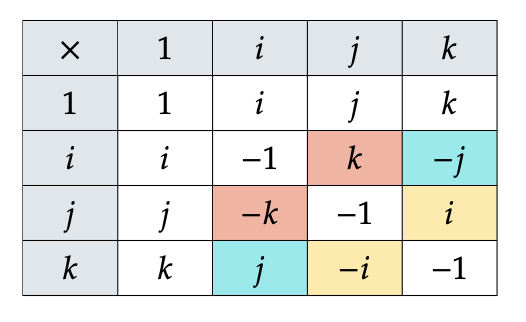 -->
    
  <div>
 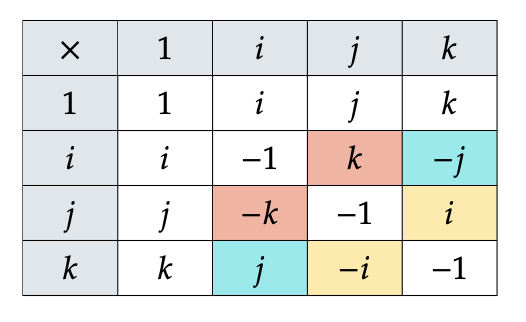
  </div>
  
   
$ q=a+bi +cj+dk =q_0 + q_1 i +q_2 j +q_3 k $ <br>

<br>
$v':$ Vector $v$ rorating $\theta$ along axis $u$ ; setting $a=cos(\frac{1}{2}\theta),b=sin(\frac{1}{2}\theta)u_x, c=sin(\frac{1}{2}\theta)u_y, d=sin(\frac{1}{2}\theta)u_z$<br> 
$ v'= R\cdot v$<br>
$R=\begin{bmatrix}q_0^2 + q_1^2 -q_2^2 -q_3^2& 2(q_1 q_2-q_0q_3) & 2(q_0 q_2+q_1 q_3)\\ 2(q_0 q_3+q_1 q_2) & q_0^2 - q_1^2 +q_2^2 -q_3^2 &  2(q_2 q_3-q_0 q_1)\\ 2(q_1 q_3+q_0 q_2) &  2(q_0 q_1+q_2 q_3) & q_0^2 - q_1^2 -q_2^2 +q_3^2\end{bmatrix}$

<!-- 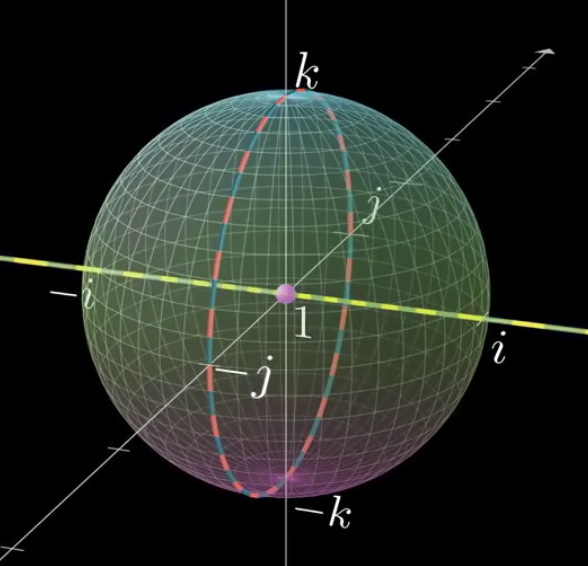 -->
    
    
 <div>
 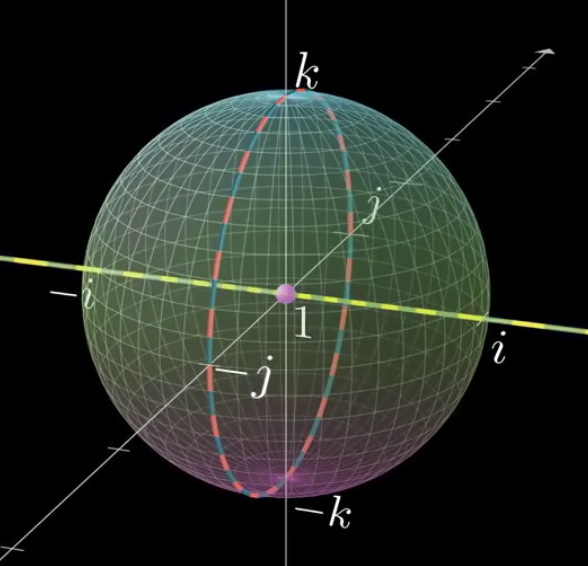
  </div>
  
  
<p> quaternion is the projection from 4 dimensional
<p> If s is positive, then the coordinate is inside the sphere while if s is negative, the coordinate is outside the sphere
<p> For unit vector in cartension system we can set s = 0, and v as the coordinate. eg: v for x-axis would be 1,0,0 so q for x-axis = [0,1,0,0]
<p> Rotating a vector $v$ along the axis $u$, rotating angle $\theta$, we can get $v'= q \cdot v \cdot q^* = [0,cos(\theta)v+(1-cos(\theta)(u\cdot v)u + sin(\theta)(u\times v))]$ that will give the same result as the matrix shown above.

* **Pro and con for Tait-Byran angles(Euler angle):**
<p>Pro: <br>1. State variables are illustrative for the user (intuitive) <br>  2. Tait-Byran angles do not introduce nonlinear algebraic constraints and are directly defined in ODE form. (If the main rotation is approximately around one axis Tait-Byran angles behave nearly linear, so that integrators with adaptive step size selection can use larger steps compared to a description with quaternions.)<br>
<p>Con: Gimbal lock (When the second rotation about the local y-axis is $α_2 = 90^◦ +n · 180^◦$  where $n ∈ Z$, x- and z-axes are parallel.) The default hierachy order is x-y-z, which means when x rotates, y and z axis are rotating with x; when y rotats, z rotating with y; when z rotates, only it self rotating
                              
<!--     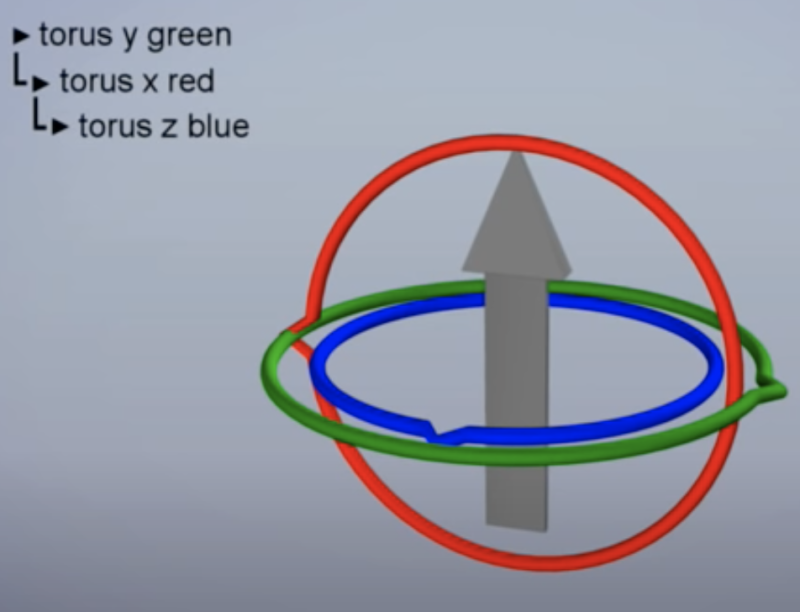 -->
    
  <div>
 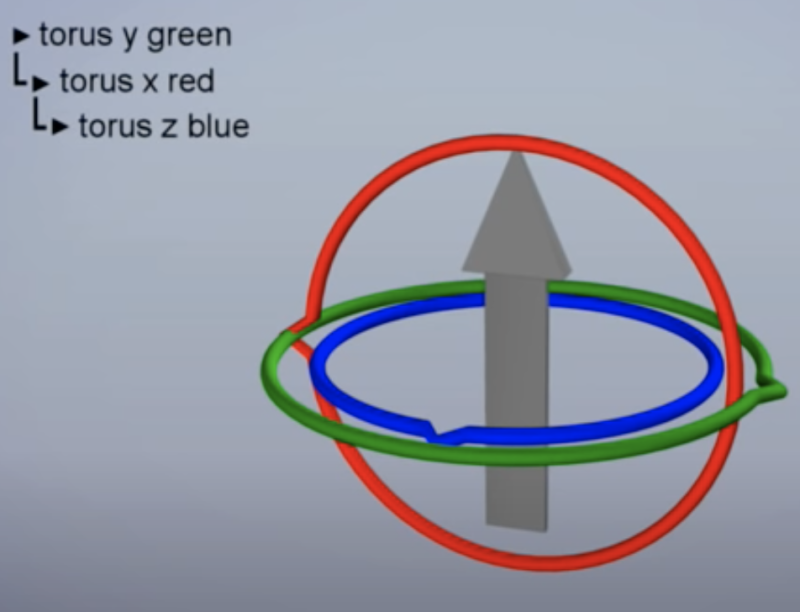
  </div>
     
Solution: In Modia3D this situation is avoided by adaptive rotation sequence handling (change hierarchy of axis when we are close to gimbal lock situation, eg, x-y-z to y-x-z )<br>

* Comparison among Tait Byran, Euler, and quaternion: https://www.youtube.com/watch?v=wV59Xg-sm70
<!-- 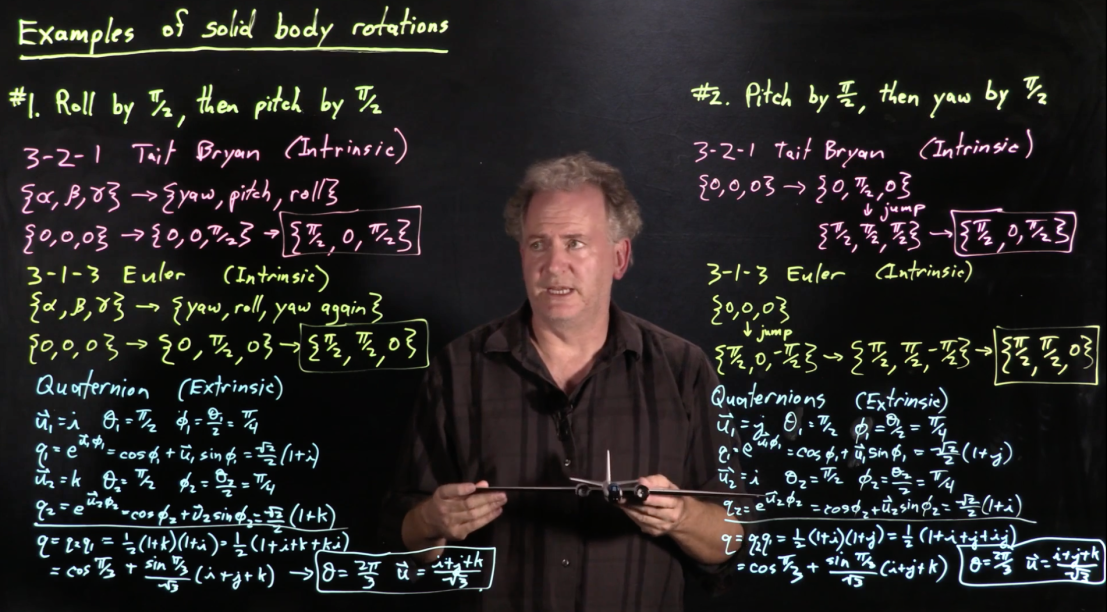 -->
<div>
 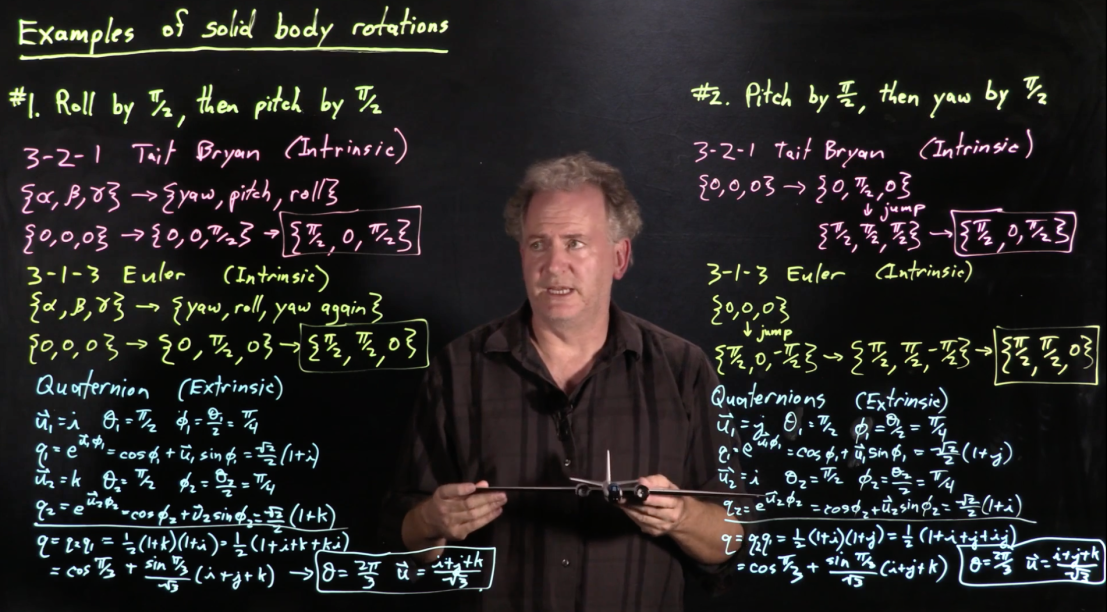
  </div>

# 2. Formulation of body-joint and how it used to model the "Youbot robot"
* Idea from Modia3D "YoubotsGripping" https://github.com/ModiaSim/Modia3D.jl/blob/main/test/Robot/YouBotsGripping.jl

<p> For $\omega = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3\end{bmatrix}$, Bracket $\omega$:
    $[\omega] = \begin{bmatrix} 0 & -\omega_3 & \omega_2 \\ \omega_3 & 0 & -\omega_1 \\ -\omega_2 & \omega_1 & 0\end{bmatrix}$. <br> Screw axes $S_i=(\omega_i,v_i).$ Furthermore, bracket of the screw axes $[S_i] = \begin{bmatrix} [\omega_i]&v_i \\ 0 & 0\end{bmatrix} $ <br> Trasformation matrix of end-effector: $T=e^{[s_1]\theta_1}e^{[s_2]\theta_2}e^{[s_3]\theta_3}...\cdot M$, where M is the stationary position.

Example: Youbot(dummy parameters from "module YouBotsGripping") 

<!-- 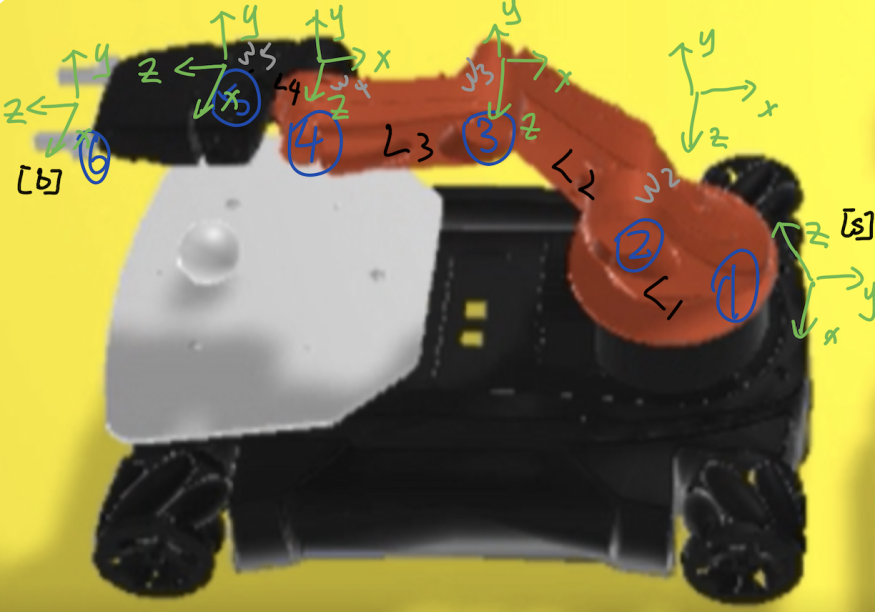 -->

 <div>
 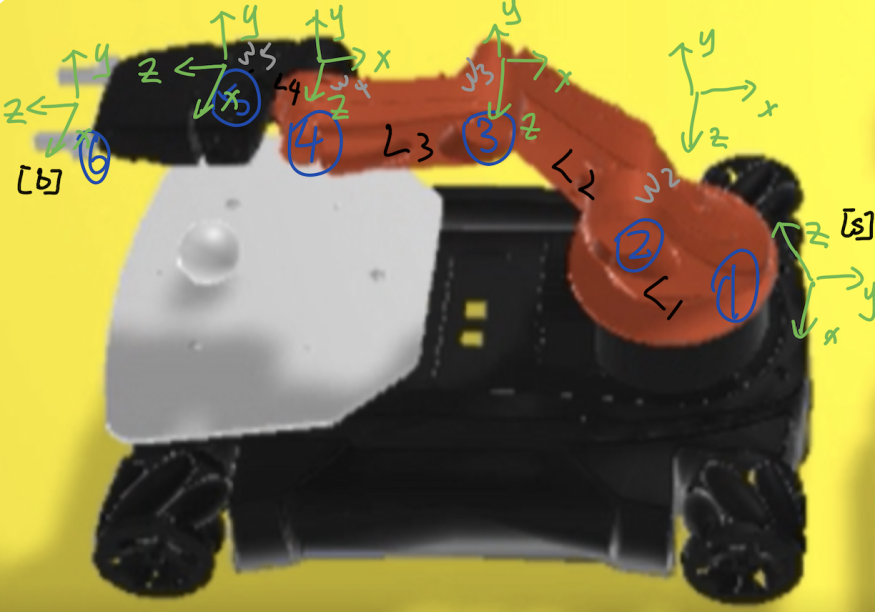
 </div>
  


$M = \begin{bmatrix}1&0&0&-W_2+W_3-W_4+W_5\\0&0&-1&0\\0&1&0&L_1+L_2+L_3+L_4+L_5\\0&0&0&1 \end{bmatrix}$

The screw axes for Youbot $S_i=(\omega_i,v_i), i =1,.....6$ are

| i | $w_i$ | $v_i$ |
| :--: | :---: | :---: |
| 1 | ( 0, 0, 1 ) | ( 0, 0, 0 )
| 2| ( 1, 0, 0 ) | ( 0, L_1, 0 ) |
| 3| ( 1, 0, 0 ) | ( 0, L_1+L2, 0 ) |
| 4 | ( 1, 0, 0 ) | ( 0, L_1+L2+L3, 0 ) |
| 5 | ( 0, 0, 1 ) | ( 0, W2-W3+W4-W5, 0 ) |
| 6 | ( 0, 0, 0 ) | ( 1, 0, 0 ) |


<p> EndEffector Position: Multiply the homogeneous matrices of each frame together (current frame transformations) to get the transformation $T_{sb}$ base to end effector.<br> Position of the end-effector wrb to [S] is then given by the 4th column [x , y , z , 1 ]. 

In [4]:
# A = [1 2;3 4]
# exp(A)
# ℯ^A #\euler + Tab



# function to compute [S]
function bracket(omega,v)
    return [0 -omega[3] omega[2] v[1]; omega[3] 0 -omega[1] v[2];-omega[2] omega[1] 0 v[3]; 0 0 0 0]
#     return [0 -omega[3] omega(2) v(1); omega(3) 0 -omega(1) v(2);-omega(2) omega(1) 0 v(3); 0 0 0 0]
end
# a = [1 2 3];b= [5 0 0]
# bracket(a,b)

L1=1;L2=2;L3=2;L4=1;L5=1.5
W2=1;W3=1;W4=1;W5=0.5
omega1=[0 0 1];omega2=[1 0 0];omega3=[1 0 0];omega4=[1 0 0];omega5=[0 0 1];omega6=[0 0 0]
v1=[0 0 0];v2=[0 L1 0];v3=[0 L1+L2 0];v4=[0 L1+L2+L3 0];v5=[0 W2-W3+W4-W5 0];v6=[1 0 0]
BrS1=bracket(omega1,v1)
BrS2=bracket(omega2,v2)
BrS3=bracket(omega3,v3)
BrS4=bracket(omega4,v4)
BrS5=bracket(omega5,v5)
BrS6=bracket(omega6,v6)
M=[1 0 0 -W2+W3-W4+W5; 0 0 -1 0; 0 1 0 L1+L2+L3+L4+L5; 0 0 0 1]
Theta=[pi -pi/4 -pi/4 -1.057 0 0]
T = ℯ^(BrS1*Theta[1])*ℯ^(BrS2*Theta[2])*ℯ^(BrS3*Theta[3])*ℯ^(BrS4*Theta[4])*ℯ^(BrS5*Theta[5])*ℯ^(BrS6*Theta[6])*M
Position = T[1:3,4]
Position #End-effectpr position with respect to frame [s]

3-element Vector{Float64}:
  0.4999999999999987
 -4.64293092352121
  0.23700120561659155

# 3.Study structure of Modia 3d based on ModiaLang and ModiaBase

<!--  <div>
 <img src="attachment:image.png" width="200"/>
     </div> -->
<!--     <img src=""> -->

### ModiaLang

* **ModiaLang**: ModiaLang is a minimalistic environment in form of a Julia package to model and simulate physical systems (electrical, mechanical, thermo-dynamical, etc.) described by differential and algebraic equations. A model component is constructed by "expression = expression" equations.https://juliahub.com/docs/ModiaLang/R9zzo/0.7.2/autodocs/


**ModiaLang.simulate!—Method**

In [ ]:
import ModiaLang
ModiaLang.simulate!(model [, algorithm]; merge = nothing,
          tolerance = 1e-6, startTime = 0.0, stopTime = 1.0, interval = NaN,
          adaptive = true, log = true, logParameters = true, logStates = true,
          requiredFinalStates = nothing)

**Instantiate model**:Needs to be done before simulate the model, basically just opening one part of memory space for that model
<br>firstOrder = @instantiateModel(FirstOrder2, logCode=true)

**Map:  Setting and modifying parameters of components and attributes of variables (Modify parameters and initial values of model)**, keep the model but change some parameters inside the model(change or modify the component already in the system)
<br>FirstOrder2 = FirstOrder | Map(T = 0.4, x = Var(init=0.6))

**Merge: Define parameters and init/start values that shall be merged with the previous values stored in model, before simulation is started.**
The used **merge operator |** is an overloaded binary operator of bitwise or with recursive merge semantics. eg: dict1 = {'a': 10, 'b': 5, 'c': 3}; dict2 = {'d': 6, 'c': 4, 'b': 8}; dict3 = dict1 | dict2; dict3 = {'a': 10, 'd': 6, 'c': 4, 'b': 8} (replacing all same elements to dict2) <br>
**Der：** derivative

In [58]:
#example of ModiaLang.simulate! and map
using Modia
@usingModiaPlot #ENV["MODIA_PLOT"] = "PyPlot"  # Use plot package defined with 
Modia.usePlotPackage("PyPlot")           # ENV["MODIA_PLOT"] or Modia.usePlotPackage(..)

Pendulum = Model(
   L = 0.8u"m",
   m = 1.0u"kg",
   d = 0.5u"N*m*s/rad",
   g = 9.81u"m/s^2",
   phi = Var(init = 1.57*u"rad"),
   w   = Var(init = 0u"rad/s"),
   equations = :[
          w = der(phi)
        0.0 = m*L^2*der(w) + d*w + m*g*L*sin(phi)
          r = [L*cos(phi), -L*sin(phi)]
   ]
)
Pendulum = Pendulum | Map(L = 0.5u"m")
pendulum1 = @instantiateModel(Pendulum)
simulate!(pendulum1, Tsit5(), stopTime = 10.0u"s", log=true)
# ENV["MODIA_PLOT"] = "PyPlot"
# ModiaResult.activate("PyPlot")
ModiaPlot_PyPlot.plot(pendulum1, [("phi", "w"); "r"], figure = 1)

using ModiaPlot_PyPlot

Instantiating model Main.Pendulum
... Simulate model Pendulum
      Initialization at time = 0.0 s
      Termination of Pendulum at time = 10.0 s
        cpuTime         = 0.212 s
        allocated       = 4.14 MiB
        algorithm       = Tsit5
        FloatType       = Float64
        interval        = 0.02 s
        tolerance       = 1.0e-6 (relative tolerance)
        nStates         = 2
        nResults        = 501
        nGetDerivatives = 1416 (total number of getDerivatives! calls)
        nf              = 913 (number of getDerivatives! calls from integrator)
        nZeroCrossings  = 0 (number of getDerivatives! calls for zero crossing detection)
        nJac            = 0 (number of Jacobian computations)
        nAcceptedSteps  = 152
        nRejectedSteps  = 0
        nErrTestFails   = 0
        nTimeEvents     = 0
        nStateEvents    = 0
        nRestartEvents  = 0


* **Reference :( ).** If the value has references to other declared variables in the model, the expressions needs to be quoted that is enclosed in **:( ).**
* **Parent** refers to the reference system of the object <br>
* A **RevoluteWithFlange** joint, that is a revolute joint with a flange, constrains the motion of axle with respect to world so that axle can only rotate around its z-axis. That rotates **obj1::Object3D** into **obj2::Object3D** along the axis axis of **obj1** (From my understanding, obj2 can only rotating along the axis of obj1(default axis is z))<br>
* **Prismatic joint** joint = Prismatic(; obj1, obj2, path="", axis=1, s=0, v=0, canCollide=true)  :translates obj2::Object3D with respect to obj1::Object3D along coordinate axis
* **Connections:** connect( connect-reference-1,connect-reference-2, ... )(in this case the damper side a is connecting to the flange of revlute joint-rev)

In [ ]:
module Pendulum3

using Modia

# Modia equation-based models
include("$(Modia.modelsPath)/AllModels.jl")

Pendulum = Model(
    world = Object3D(feature=Scene(animationFile="Pendulum3.json")),
#     obj1  = Object3D(feature=Solid(shape=Beam(axis=1, length=1.0, width=0.2, thickness=0.2),
#                 solidMaterial="Steel", visualMaterial=VisualMaterial(color="Blue"))), #Beam doesnt work for some reason, replacing box
    obj1  = Object3D(feature=Solid(shape=Box(lengthX=1.0, lengthY=0.2, lengthZ=0.2),
                solidMaterial="Steel", visualMaterial=VisualMaterial(color="Blue"))),
    
    obj2  = Object3D(parent=:obj1, feature=Visual(shape=Cylinder(diameter=0.1, length=0.21),
                visualMaterial=VisualMaterial(color="Red")), translation=[-0.5, 0.0, 0.0]),
                #parent:obj1 means that obj2 is wrb to obj1 tralates -0.5 x
    rev   = RevoluteWithFlange(obj1=:world, obj2=:obj2),

    damper  = Damper | Map(d=100.0),
    fixed   = Fixed,
    connect = :[(damper.flange_b, rev.flange),
                (damper.flange_a, fixed.flange)]
)

pendulum = @instantiateModel(buildModia3D(Pendulum), unitless=true)
simulate!(pendulum, stopTime=3.0)

@usingModiaPlot
plot(pendulum, "rev.phi")

end

In [ ]:
module Pendulum1
# import Modia3D
using Modia
@usingModiaPlot 
Modia.usePlotPackage("PyPlot")
Pendulum = Model(
    world     = Object3D(feature=Scene()),
    body      = Object3D(feature=Solid(massProperties=MassProperties(mass=1.0))),
    bodyFrame = Object3D(parent=:body, translation=[-0.5, 0.0, 0.0]),
    rev       = Revolute(obj1=:world, obj2=:bodyFrame)
)

# Pendulum = Pendulum | Map( bodyFrame = Object3D(parent=:body, translation=[-0.3, 0.0, 0.0]))

pendulum = @instantiateModel(buildModia3D(Pendulum), unitless=true)
simulate!(pendulum, stopTime=3.0u"s", merge = Map(bodyFrame = Object3D(parent=:body, translation=[-0.3, 0.0, 0.0])))
time=get_result(pendulum,"time")
angle=get_result(pendulum,"rev.phi")
# simulate!(pendulum, stopTime=3.0)

# @usingModiaPlot    ENV["MODIA_PLOT"] = "PyPlot" # use the plot package defined by ENV["MODIA_PLOT"]
# ModiaPlot_PyPlot.plot(pendulum, "rev.phi")
# plot(pendulum, "rev.phi")
plot(ustrip(time),ustrip(angle))
end

### ModiaBase
**ModiaBase** provides functions to support the transformation of a Differential Algebraic Equation system (DAE) to an explicit Ordinary Differential Equation system (ODE) https://modiasim.github.io/ModiaBase.jl/stable/index.html <br>

<!-- 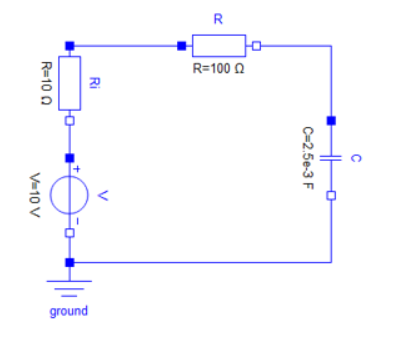 -->
* 1. Regular DAEs (Index Zero DAEs) https://modiasim.github.io/ModiaBase.jl/stable/Tutorial.html#.-Regular-DAEs-(Index-Zero-DAEs)
<div>
 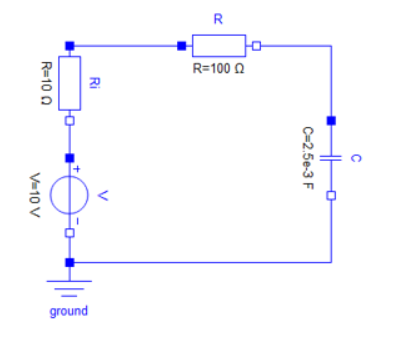 </div>
 **Bi-Partite Graph**
 <div>
 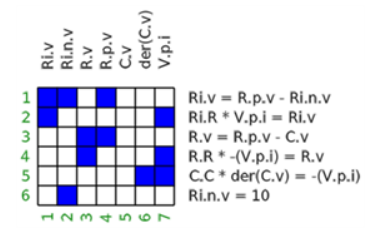</div>
 
 **Assignment** :  Red marks show the assigned variables.Blue marks show if a variable is part of the respective equation
 <div>
 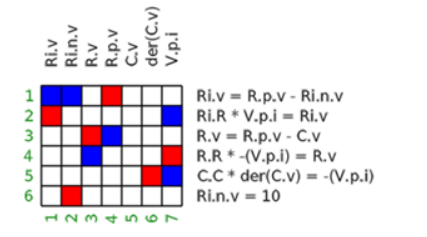</div>
 
 **Block Lower Triangular transformation** : Red marks show the assigned variables.
Blue marks show if a variable is part of the respective equation.
A grey area marks an algebraic loop.
 <div>
 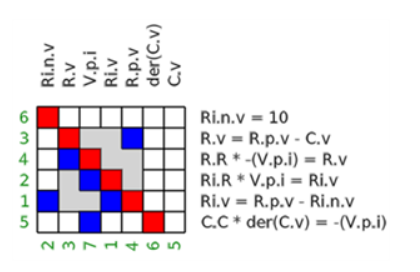</div>
 
<!--  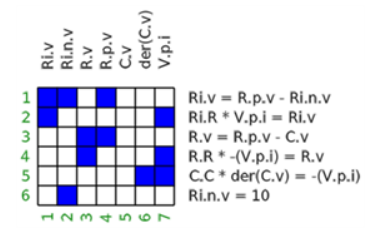 -->
<!--  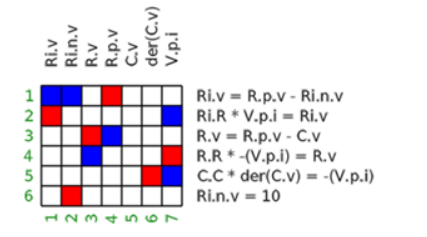 -->
<!-- 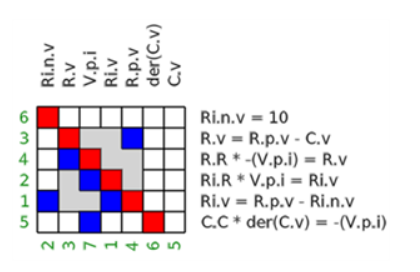 -->


In [11]:
#1. Bi-partite graph of low pass filter
G = Vector{Int}[ [1,2,4],
                 [1,7],
                 [3,4],
                 [3,7],
                 [6,7],
                 [2] ]
#2.assignment
# using Modia
using ModiaBase
M          = 7  # Number of variables
vActive    = fill(true,M)
vActive[5] = false    # state C.v is known
assign     = ModiaBase.matching(G, M, vActive)

# assign = [2,6,3,1,0,5,4]
#3.sortting
blt = ModiaBase.BLT(G, assign)

#     blt = [ [6],
#            [3,4,2,1],
#            [5] ]


3-element Vector{Any}:
 Any[6]
 Any[2, 4, 3, 1]
 Any[5]

### Modia  

* Combining a multibody system with equation based models (missing)
* Equation based pendulum example including uncertainty

<div>
 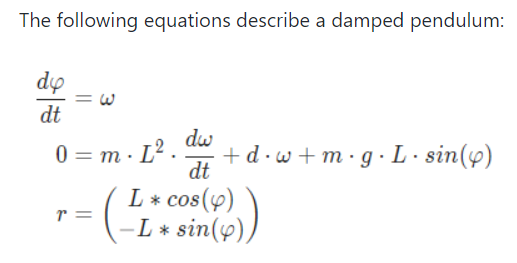 </div>
 <div>
<!-- 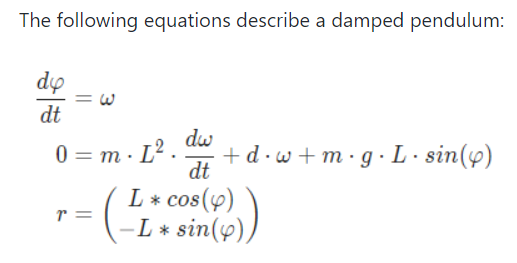 -->
   

In [ ]:
using Modia
# @usingModiaPlot  # Use plot package defined with 
                 # ENV["MODIA_PLOT"] or Modia.usePlotPackage(..)
@usingModiaPlot 
Modia.usePlotPackage("PyPlot")

Pendulum = Model(
   L = 0.8u"m",
   m = 1.0u"kg",
   d = 0.5u"N*m*s/rad",
   g = 9.81u"m/s^2",
   phi = Var(init = 1.57*u"rad"),
   w   = Var(init = 0u"rad/s"),
   equations = :[
          w = der(phi)
        0.0 = m*L^2*der(w) + d*w + m*g*L*sin(phi)
          r = [L*cos(phi), -L*sin(phi)]
   ]
)

pendulum1 = @instantiateModel(Pendulum)
simulate!(pendulum1, Tsit5(), stopTime = 10.0u"s", log=true)
ModiaPlot_PyPlot.plot(pendulum1, [("phi", "w"); "r"], figure = 1)

#add uncertainty

using Measurements

PendulumWithUncertainties = Pendulum | Map(L = (0.8 ± 0.2)u"m",
                                           m = (1.0 ± 0.2)u"kg",
                                           d = (0.5 ± 0.2)u"N*m*s/rad")

pendulum2 =  @instantiateModel(PendulumWithUncertainties,
                               FloatType = Measurement{Float64})

simulate!(pendulum2, Tsit5(), stopTime = 10.0u"s")
ModiaPlot_PyPlot.plot(pendulum2, [("phi", "w"); "r"], figure = 2)

# 4.Study the solution sequence outlined in the paper (previous) about the index reduction of DAE

## Terminology:

* **A differential-algebraic equation (DAE)** is an equation involving an unknown function and its derivatives.

* **Index** is a notion used in the theory of DAEs for measuring the distance from a DAE to its related ODE. Specifically, it is the number of times needed to differentiate the DAEs to get a system of ODEs with respect to t.

## Steps:

* **Matching**:  Bipartite graph <br>
Find a unique mapping between variables and equations. Used both in BLT sorting and Pantelides algorithm.<br>
If we can find the matching from the incidence matrix, that means the DAE is an index-1 or index-0 such that we can proceed to BLT sorting. <br> If the matching cannot be found, then we need to apply an index reduction stretegy of the DAE.

* **BLT sorting**: ( Block Lower Triangular form with an algebraic loop.)<br>
An DAE in BLT form with algebraic loops is Index 1 <br>
Firstly, construct equation dependency graph.<br>
Secondly, sort into blocks of equations using Tarjan's strongly connected mponent algotthm<br>

* **Solving**: Numerical method such as BDF(Backward Differentiation Formula) and DAE integrator also doable

* **Index Reduction**: If the above Matching/Sorting strategies are not applicable to the current DAE, we need to apply an Index Reduction to the DAE  and reduce toe DAE to first order. (For example, Pantelides algorithm)

### Pantelides algorithm

* **MSS:** A structurally singular subset is called minimally structurally singular (MSS) if none of its proper subsets is structurally singular.<br>A system of equations is called structurally singular with respect to a certain set of variables if it contains a structurally singular subset with respect to the same set of variables.

* An **assignment** is a set of edges $(i-j)$ such that no node or $j$ appears in more than one edge in the set. An assignment is complete if it leaves no E-node exposed; otherwise it is called a partial assignment. <br>**Edges** in the assignment are called matching edges. <br> A **node** is exposed if it does not appear in any matching edge.<br>
An **augmenting path** is a path with exposed nodes at both ends and alternating nonmatching and matching edges between them; in the trivial case, the path may just consist of only one (nonmatching) edge between two exposed nodes.

* **Variable Association List A:** Relationships between variables and their derivatives with respect to time are expressed through a Variable Association List A defined as: $A(j)=k$ if $X_k=\frac{dX_j}{dt}, 1\leq j, k\leq 2n+m; 0 , otherwise$ <br> Example: $X_3=\dot{x},X_1=x, so  X_3=\frac{dX_1}{dt}, so A(1)=3$

* **Equation Association List B:** $B(i)=l$ if the $l$ th equation has been created by differentiating equation $i$; 0, otherwise. <br>List B is initialized to all zeros.

Pantelides algorithm: Detailed code solution procedure can be found in this slide https://ptolemy.berkeley.edu/projects/embedded/eecsx44/lectures/Spring2013/modelica-dae-part-2.pdf <br> and the principles of Pantelides algorithm are there https://epubs.siam.org/doi/pdf/10.1137/0909014

* Pendulum example

<!-- ![image.png](attachment:image5.png) -->
<!-- 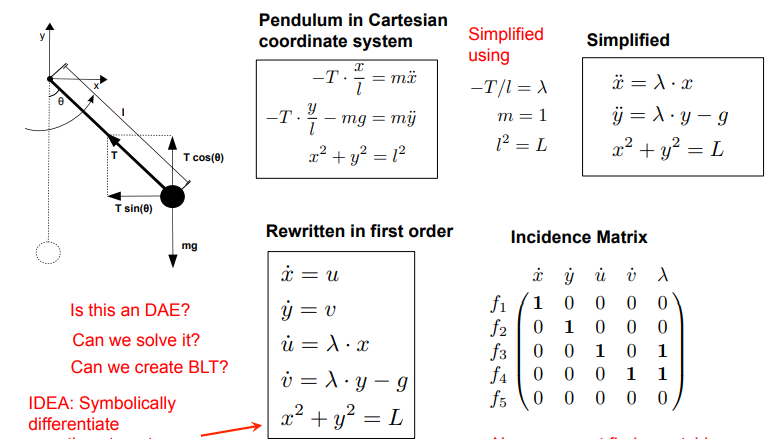 -->
<div>
 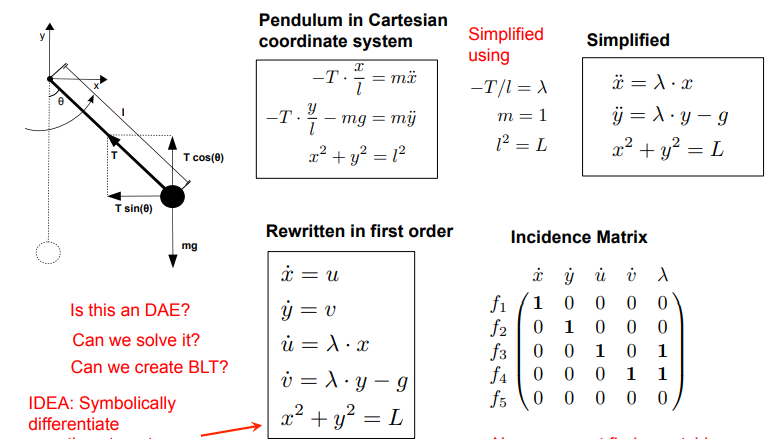</div>
 <div>
 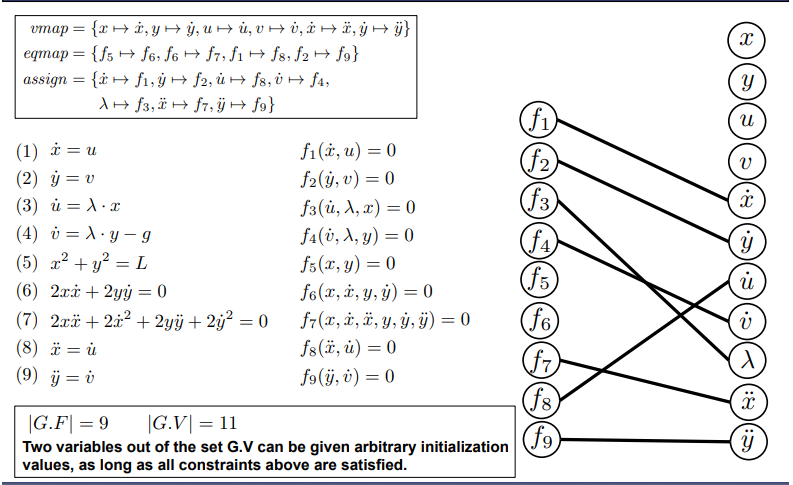</div>

# 5.Study the solution sequence of Modeling Toolkit

General example: https://mtk.sciml.ai/stable/#Feature-Summary <br>
High level examples: https://juliapackages.com/p/modelingtoolkit <br>
ModelingToolkit.jl is a modeling language for high-performance symbolic-numeric computation in scientific computing and scientific machine learning.

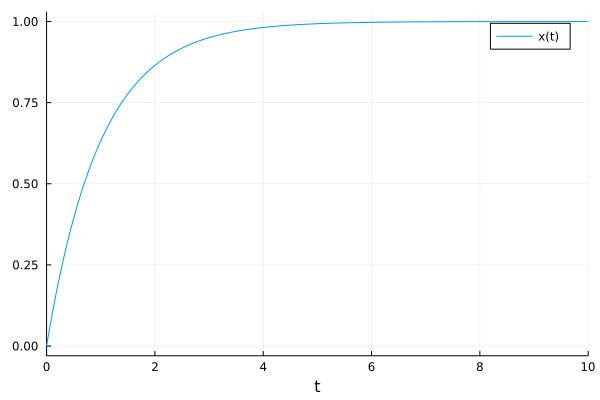

In [59]:
using ModelingToolkit
using DifferentialEquations: solve
# using Plots: plot
import Plots
# import Pyplot
function unitstep_fol_factory(;name)
    @parameters τ
    @variables t x(t)
    D = Differential(t) 
    ODESystem( D(x) ~ (1 - x)/τ; name, defaults=Dict(x=>0.0, τ=>1.0))
#     ODESystem( D(x) ~ (1 - x)/τ; name)
end

ODEProblem(unitstep_fol_factory(name=:fol),[],(0.0,5.0),[]) |> solve
prob = ODEProblem(unitstep_fol_factory(name=:fol), [:x => 2.0], (0.0,10.0), [:τ => 5.0])

Plots.plot(solve(prob))

* Second Order ODE
\begin{aligned}
    x^{\prime\prime} &= \sigma \cdot(y-x)\\
    y^\prime &= x\cdot(\rho-z)-y\\
    z^\prime &= x\cdot y -\beta \cdot z
\end{aligned}

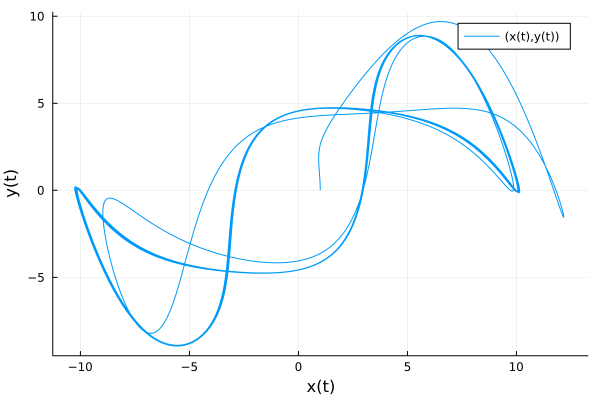

In [57]:
using ModelingToolkit, OrdinaryDiffEq

@parameters t σ ρ β
@variables x(t) y(t) z(t)
D = Differential(t)

eqs = [D(D(x)) ~ σ*(y-x),
       D(y) ~ x*(ρ-z)-y,
       D(z) ~ x*y - β*z]

@named sys = ODESystem(eqs)
sys = ode_order_lowering(sys)

u0 = [D(x) => 0.0,
      x => 1.0,
      y => 0.0,
      z => 0.0]

p  = [σ => 10.0,
      ρ => 10.0,
      β => 8/3]

tspan = (0.0,100.0)
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Tsit5())
import Plots; 
Plots.plot(sol,vars=(x,y))

* Pendulum Example: DAE reduction
\begin{aligned}
    x^\prime &= v_x\\
    v_x^\prime &= Tx\\
    y^\prime &= v_y\\
    v_y^\prime &= Ty - g\\
    0 &= x^2 + y^2 - L^2
\end{aligned}

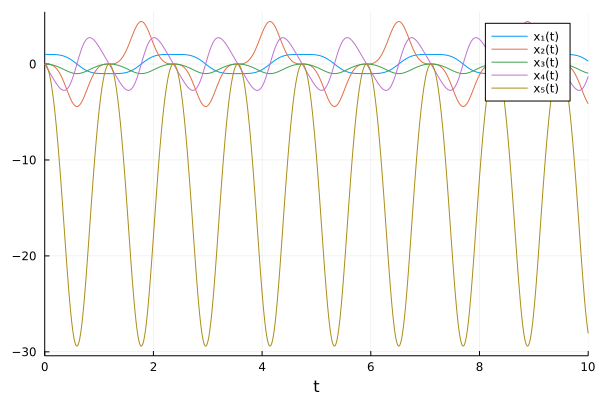

In [51]:
using ModelingToolkit
using LinearAlgebra
using OrdinaryDiffEq
import Plots

function pendulum!(du, u, p, t)
    x, dx, y, dy, T = u
    g, L = p
    du[1] = dx
    du[2] = T*x
    du[3] = dy
    du[4] = T*y - g
    du[5] = x^2 + y^2 - L^2
    return nothing
end
pendulum_fun! = ODEFunction(pendulum!, mass_matrix=Diagonal([1,1,1,1,0]))
u0 = [1.0, 0, 0, 0, 0]
p = [9.8, 1]
tspan = (0, 10.0)
pendulum_prob = ODEProblem(pendulum_fun!, u0, tspan, p)
traced_sys = modelingtoolkitize(pendulum_prob)  # use modelingtoolkitize to transform the numerical code into symbolic code
pendulum_sys = structural_simplify(dae_index_lowering(traced_sys))#run dae_index_lowering lowering
prob = ODAEProblem(pendulum_sys, Pair[], tspan) #transform back to numerical code with ODEProblem
sol = solve(prob, Tsit5(),abstol=1e-8,reltol=1e-8)
Plots.plot(sol, vars=states(traced_sys))